In [2]:
import os
import shutil
import random
import keras
import tensorflow

classes_number = 4

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation, Dense 
from tensorflow.keras import Model
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.utils import get_custom_objects

train_path = 'data/Farm_Dataset/train'
valid_path = 'data/Farm_Dataset/valid'
test_path = 'data/Farm_Dataset/test'

# MobileNet expect 224 by 224 images.
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


In [4]:
mobile = keras.applications.MobileNetV3SmallMod()

In [5]:
mobile.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 Conv (Conv2D)                  (None, None, None,   432         ['rescaling[0][0]']              
                                16)                                                

                                                                                                  
 expanded_conv_1/depthwise/Batc  (None, None, None,   288        ['expanded_conv_1/depthwise[0][0]
 hNorm (BatchNormalization)     72)                              ']                               
                                                                                                  
 re_lu_4 (ReLU)                 (None, None, None,   0           ['expanded_conv_1/depthwise/Batch
                                72)                              Norm[0][0]']                     
                                                                                                  
 expanded_conv_1/project (Conv2  (None, None, None,   1728       ['re_lu_4[0][0]']                
 D)                             24)                                                               
                                                                                                  
 expanded_

 expanded_conv_3/squeeze_excite  (None, 1, 1, 96)    0           ['multiply_2[0][0]']             
 /AvgPool (GlobalAveragePooling                                                                   
 2D)                                                                                              
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    2328        ['expanded_conv_3/squeeze_excite/
 /Conv (Conv2D)                                                  AvgPool[0][0]']                  
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    0           ['expanded_conv_3/squeeze_excite/
 /Relu (ReLU)                                                    Conv[0][0]']                     
                                                                                                  
 expanded_

                                                                                                  
 re_lu_12 (ReLU)                (None, 1, 1, 240)    0           ['tf.__operators__.add_7[0][0]'] 
                                                                                                  
 tf.math.multiply_7 (TFOpLambda  (None, 1, 1, 240)   0           ['re_lu_12[0][0]']               
 )                                                                                                
                                                                                                  
 expanded_conv_4/squeeze_excite  (None, None, None,   0          ['multiply_4[0][0]',             
 /Mul (Multiply)                240)                              'tf.math.multiply_7[0][0]']     
                                                                                                  
 expanded_conv_4/project (Conv2  (None, None, None,   9600       ['expanded_conv_4/squeeze_excite/
 D)       

 D)                             40)                              Mul[0][0]']                      
                                                                                                  
 expanded_conv_5/project/BatchN  (None, None, None,   160        ['expanded_conv_5/project[0][0]']
 orm (BatchNormalization)       40)                                                               
                                                                                                  
 expanded_conv_5/Add (Add)      (None, None, None,   0           ['expanded_conv_4/Add[0][0]',    
                                40)                               'expanded_conv_5/project/BatchNo
                                                                 rm[0][0]']                       
                                                                                                  
 expanded_conv_6/expand (Conv2D  (None, None, None,   4800       ['expanded_conv_5/Add[0][0]']    
 )        

 tf.__operators__.add_14 (TFOpL  (None, None, None,   0          ['expanded_conv_7/expand/BatchNor
 ambda)                         144)                             m[0][0]']                        
                                                                                                  
 re_lu_19 (ReLU)                (None, None, None,   0           ['tf.__operators__.add_14[0][0]']
                                144)                                                              
                                                                                                  
 tf.math.multiply_14 (TFOpLambd  (None, None, None,   0          ['re_lu_19[0][0]']               
 a)                             144)                                                              
                                                                                                  
 multiply_9 (Multiply)          (None, None, None,   0           ['expanded_conv_7/expand/BatchNor
          

                                288)                             m[0][0]',                        
                                                                  'tf.math.multiply_17[0][0]']    
                                                                                                  
 expanded_conv_8/depthwise/pad   (None, None, None,   0          ['multiply_11[0][0]']            
 (ZeroPadding2D)                288)                                                              
                                                                                                  
 expanded_conv_8/depthwise (Dep  (None, None, None,   7200       ['expanded_conv_8/depthwise/pad[0
 thwiseConv2D)                  288)                             ][0]']                           
                                                                                                  
 expanded_conv_8/depthwise/Batc  (None, None, None,   1152       ['expanded_conv_8/depthwise[0][0]
 hNorm (Ba

 re_lu_26 (ReLU)                (None, None, None,   0           ['tf.__operators__.add_21[0][0]']
                                576)                                                              
                                                                                                  
 tf.math.multiply_21 (TFOpLambd  (None, None, None,   0          ['re_lu_26[0][0]']               
 a)                             576)                                                              
                                                                                                  
 multiply_14 (Multiply)         (None, None, None,   0           ['expanded_conv_9/depthwise/Batch
                                576)                             Norm[0][0]',                     
                                                                  'tf.math.multiply_21[0][0]']    
                                                                                                  
 expanded_

 expanded_conv_10/squeeze_excit  (None, 1, 1, 576)   0           ['multiply_16[0][0]']            
 e/AvgPool (GlobalAveragePoolin                                                                   
 g2D)                                                                                             
                                                                                                  
 expanded_conv_10/squeeze_excit  (None, 1, 1, 144)   83088       ['expanded_conv_10/squeeze_excite
 e/Conv (Conv2D)                                                 /AvgPool[0][0]']                 
                                                                                                  
 expanded_conv_10/squeeze_excit  (None, 1, 1, 144)   0           ['expanded_conv_10/squeeze_excite
 e/Relu (ReLU)                                                   /Conv[0][0]']                    
                                                                                                  
 expanded_

In [26]:
for layer in mobile.layers:
    if layer.name == 'expanded_conv_6/project/BatchNorm':
        output = layer.output
        print("Success!")
        break

model_1 = Model(inputs=mobile.inputs, outputs=output)
model_1.summary()

Success!
Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 Conv (Conv2D)                  (None, None, None,   432         ['rescaling[0][0]']              
                                16)                                               

                                                                                                  
 expanded_conv_1/depthwise/Batc  (None, None, None,   288        ['expanded_conv_1/depthwise[0][0]
 hNorm (BatchNormalization)     72)                              ']                               
                                                                                                  
 re_lu_4 (ReLU)                 (None, None, None,   0           ['expanded_conv_1/depthwise/Batch
                                72)                              Norm[0][0]']                     
                                                                                                  
 expanded_conv_1/project (Conv2  (None, None, None,   1728       ['re_lu_4[0][0]']                
 D)                             24)                                                               
                                                                                                  
 expanded_

 expanded_conv_3/squeeze_excite  (None, 1, 1, 96)    0           ['multiply_2[0][0]']             
 /AvgPool (GlobalAveragePooling                                                                   
 2D)                                                                                              
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    2328        ['expanded_conv_3/squeeze_excite/
 /Conv (Conv2D)                                                  AvgPool[0][0]']                  
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    0           ['expanded_conv_3/squeeze_excite/
 /Relu (ReLU)                                                    Conv[0][0]']                     
                                                                                                  
 expanded_

                                                                                                  
 re_lu_12 (ReLU)                (None, 1, 1, 240)    0           ['tf.__operators__.add_7[0][0]'] 
                                                                                                  
 tf.math.multiply_7 (TFOpLambda  (None, 1, 1, 240)   0           ['re_lu_12[0][0]']               
 )                                                                                                
                                                                                                  
 expanded_conv_4/squeeze_excite  (None, None, None,   0          ['multiply_4[0][0]',             
 /Mul (Multiply)                240)                              'tf.math.multiply_7[0][0]']     
                                                                                                  
 expanded_conv_4/project (Conv2  (None, None, None,   9600       ['expanded_conv_4/squeeze_excite/
 D)       

 D)                             40)                              Mul[0][0]']                      
                                                                                                  
 expanded_conv_5/project/BatchN  (None, None, None,   160        ['expanded_conv_5/project[0][0]']
 orm (BatchNormalization)       40)                                                               
                                                                                                  
 expanded_conv_5/Add (Add)      (None, None, None,   0           ['expanded_conv_4/Add[0][0]',    
                                40)                               'expanded_conv_5/project/BatchNo
                                                                 rm[0][0]']                       
                                                                                                  
 expanded_conv_6/expand (Conv2D  (None, None, None,   4800       ['expanded_conv_5/Add[0][0]']    
 )        

In [28]:
for layer in mobile.layers:
    if layer.name == 'expanded_conv_9/expand':
        input_3 = layer.input
        print("Success!")
        break

        
x = mobile.layers[-2].output
output_3 = Dense(units=classes_number, activation='softmax')(x)
model_3 = Model(inputs=input_3, outputs=output_3)
model_3.summary()

Success!
Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, None, None,  0           []                               
                                 96)]                                                             
                                                                                                  
 expanded_conv_9/expand (Conv2D  (None, None, None,   55296      ['input_5[0][0]']                
 )                              576)                                                              
                                                                                                  
 expanded_conv_9/expand/BatchNo  (None, None, None,   2304       ['expanded_conv_9/expand[4][0]'] 
 rm (BatchNormalization)        576)                                              

                                                                                                  
 tf.__operators__.add_23 (TFOpL  (None, None, None,   0          ['expanded_conv_10/expand/BatchNo
 ambda)                         576)                             rm[4][0]']                       
                                                                                                  
 re_lu_28 (ReLU)                (None, None, None,   0           ['tf.__operators__.add_23[4][0]']
                                576)                                                              
                                                                                                  
 tf.math.multiply_23 (TFOpLambd  (None, None, None,   0          ['re_lu_28[4][0]']               
 a)                             576)                                                              
                                                                                                  
 multiply_

                                576)                              'tf.math.multiply_26[4][0]']    
                                                                                                  
 global_average_pooling2d (Glob  (None, 1, 1, 576)   0           ['multiply_17[4][0]']            
 alAveragePooling2D)                                                                              
                                                                                                  
 Conv_2 (Conv2D)                (None, 1, 1, 1024)   590848      ['global_average_pooling2d[4][0]'
                                                                 ]                                
                                                                                                  
 tf.__operators__.add_27 (TFOpL  (None, 1, 1, 1024)  0           ['Conv_2[4][0]']                 
 ambda)                                                                                           
          

In [29]:
from MobileNetCode import _inverted_res_block_dilation

se_ratio = 0.25
activation = hard_swish
kernel = (3, 3)
alpha = 1

def depth(d):
    return _depth(d * alpha)

combined_input = model_1.layers[0].input
x = model_1(combined_input)
x = _inverted_res_block_dilation(x, 6, depth(48), kernel, 1, se_ratio, activation, 12)
x = _inverted_res_block_dilation(x, 6, depth(96), kernel, 1, se_ratio, activation, 13)
output_3 = model_3(x)

model = Model(inputs=mobile.input, outputs=output_3)
model.summary()

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 model_14 (Functional)          (None, None, None,   164672      ['input_1[0][0]']                
                                48)                                                               
                                                                                                  
 expanded_conv_12/expand_Dilate  (None, None, None,   13824      ['model_14[0][0]']               
  (Conv2D)                      288)                                                       

                                                                                                  
 expanded_conv_13/expand/BatchN  (None, None, None,   1152       ['expanded_conv_13/expand_Dilate[
 orm (BatchNormalization)       288)                             0][0]']                          
                                                                                                  
 tf.__operators__.add_100 (TFOp  (None, None, None,   0          ['expanded_conv_13/expand/BatchNo
 Lambda)                        288)                             rm[0][0]']                       
                                                                                                  
 re_lu_105 (ReLU)               (None, None, None,   0           ['tf.__operators__.add_100[0][0]'
                                288)                             ]                                
                                                                                                  
 tf.math.m

In [30]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
from tensorflow import keras
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import keras.losses

prediction = EarlyStopping(
    monitor="val_accuracy", patience=50, restore_best_weights=True
)
history = model.fit(
    x=train_batches, 
    validation_data=valid_batches, 
    epochs=500, 
    verbose=2,
    callbacks=[prediction]
)

Epoch 1/500
100/100 - 61s - loss: 0.3841 - accuracy: 0.8390 - val_loss: 6.4905 - val_accuracy: 0.2500 - 61s/epoch - 608ms/step
Epoch 2/500
100/100 - 50s - loss: 0.0747 - accuracy: 0.9740 - val_loss: 6.9312 - val_accuracy: 0.2500 - 50s/epoch - 505ms/step
Epoch 3/500
100/100 - 50s - loss: 0.0428 - accuracy: 0.9870 - val_loss: 7.6510 - val_accuracy: 0.2500 - 50s/epoch - 497ms/step
Epoch 4/500
100/100 - 49s - loss: 0.0681 - accuracy: 0.9810 - val_loss: 7.6786 - val_accuracy: 0.2500 - 49s/epoch - 487ms/step
Epoch 5/500
100/100 - 44s - loss: 0.0157 - accuracy: 0.9970 - val_loss: 7.4217 - val_accuracy: 0.2500 - 44s/epoch - 444ms/step
Epoch 6/500
100/100 - 53s - loss: 0.0094 - accuracy: 0.9950 - val_loss: 8.1534 - val_accuracy: 0.2500 - 53s/epoch - 526ms/step
Epoch 7/500
100/100 - 48s - loss: 0.0292 - accuracy: 0.9920 - val_loss: 9.3113 - val_accuracy: 0.2500 - 48s/epoch - 479ms/step
Epoch 8/500
100/100 - 44s - loss: 0.0115 - accuracy: 0.9960 - val_loss: 8.7306 - val_accuracy: 0.2500 - 44s/epo

Epoch 65/500
100/100 - 46s - loss: 0.0035 - accuracy: 0.9980 - val_loss: 1.6697 - val_accuracy: 0.6950 - 46s/epoch - 463ms/step
Epoch 66/500
100/100 - 49s - loss: 0.0051 - accuracy: 0.9970 - val_loss: 2.5332 - val_accuracy: 0.6662 - 49s/epoch - 493ms/step
Epoch 67/500
100/100 - 42s - loss: 0.0188 - accuracy: 0.9960 - val_loss: 7.9233 - val_accuracy: 0.3100 - 42s/epoch - 419ms/step
Epoch 68/500
100/100 - 42s - loss: 1.5975e-04 - accuracy: 1.0000 - val_loss: 5.3776 - val_accuracy: 0.3713 - 42s/epoch - 418ms/step
Epoch 69/500
100/100 - 39s - loss: 0.0019 - accuracy: 0.9990 - val_loss: 1.8249 - val_accuracy: 0.7063 - 39s/epoch - 390ms/step
Epoch 70/500
100/100 - 52s - loss: 0.0173 - accuracy: 0.9960 - val_loss: 1.8167 - val_accuracy: 0.8525 - 52s/epoch - 522ms/step
Epoch 71/500
100/100 - 49s - loss: 0.0181 - accuracy: 0.9970 - val_loss: 0.4166 - val_accuracy: 0.9137 - 49s/epoch - 487ms/step
Epoch 72/500
100/100 - 48s - loss: 0.0029 - accuracy: 0.9990 - val_loss: 0.0281 - val_accuracy: 0.98

Epoch 128/500
100/100 - 57s - loss: 2.2621e-05 - accuracy: 1.0000 - val_loss: 3.0051e-06 - val_accuracy: 1.0000 - 57s/epoch - 574ms/step
Epoch 129/500
100/100 - 48s - loss: 1.0697e-05 - accuracy: 1.0000 - val_loss: 1.8330e-06 - val_accuracy: 1.0000 - 48s/epoch - 476ms/step


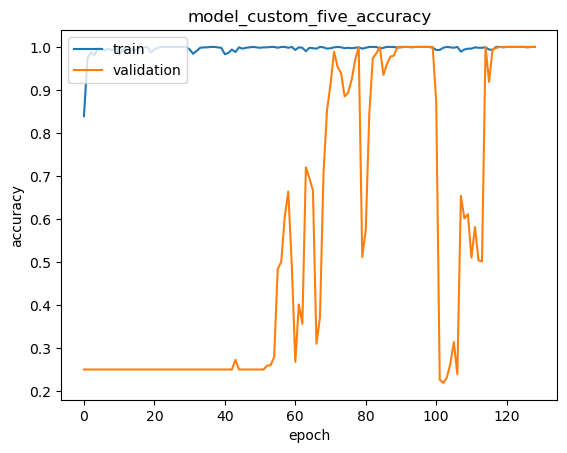

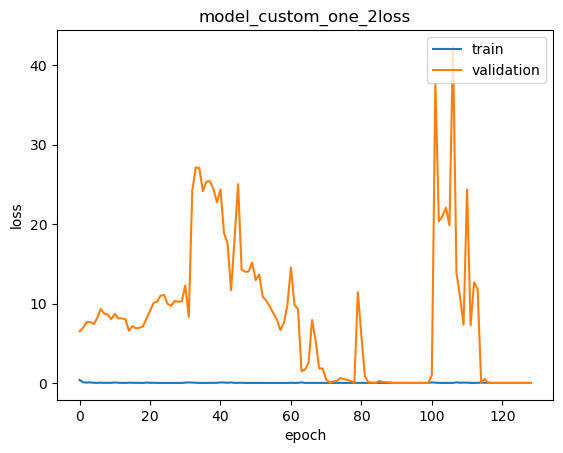

INFO:tensorflow:Assets written to: Trained_Mobile_Custom_Seven_Model\assets


INFO:tensorflow:Assets written to: Trained_Mobile_Custom_Seven_Model\assets


In [32]:
def plot_all(history):
    """
    The plot_all() function takes the history of the trained model
    and create two plots for accuracy and loss of both training and validation.
    The plots are saved as png files

    Args:
        history: The history to use and plot

    """
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model_custom_five_accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.savefig("plot_accuracy_mobile_custom_seven.png")
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model_custom_one_2loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.savefig("plot_loss_mobile_custom_seven.png")
    plt.show()
    

plot_all(history)
model.save("Trained_Mobile_Custom_Seven_Model")

In [33]:
test_labels = test_batches.classes
predictions = model.predict(x=test_batches, verbose=0)

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [35]:
test_batches.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3}

Confusion matrix, without normalization
[[150   0   0   0]
 [  0 150   0   0]
 [  0   0 150   0]
 [  0   0  23 127]]


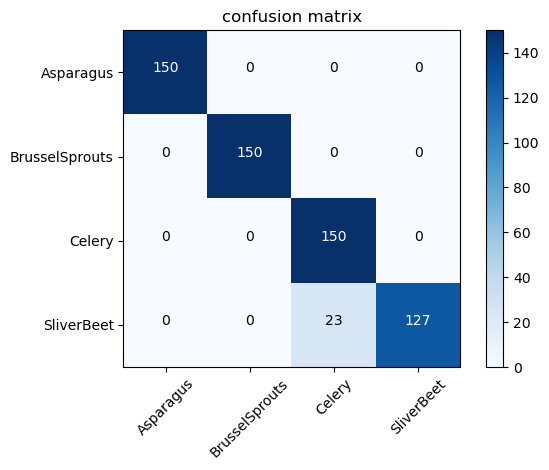

In [36]:
from matplotlib import pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.savefig("confusion_mobile_custom_seven.png")
    

cm_plot_labels = ['Asparagus', 'BrusselSprouts', 'Celery', 'SliverBeet']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion matrix')